                                    **Exploratory data analysis**

In [39]:
#importing Required Library
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
#visualzation settings
plt.rcParams['figure.figsize'] = (8, 5)
sns.set(style="whitegrid")

In [41]:
# Load dataset
df = pd.read_csv("StudentPerformance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [42]:
#Number of rows and columns
df.shape

(10000, 6)

In [43]:
#Data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [44]:
#column names
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [45]:
#summary statistics(numerical)
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [46]:
#summary statiscs(categorical)
df.describe(include=['object'])

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


In [47]:
#check missing values
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [48]:
#check duplicate rows
df.duplicated().sum()

np.int64(127)

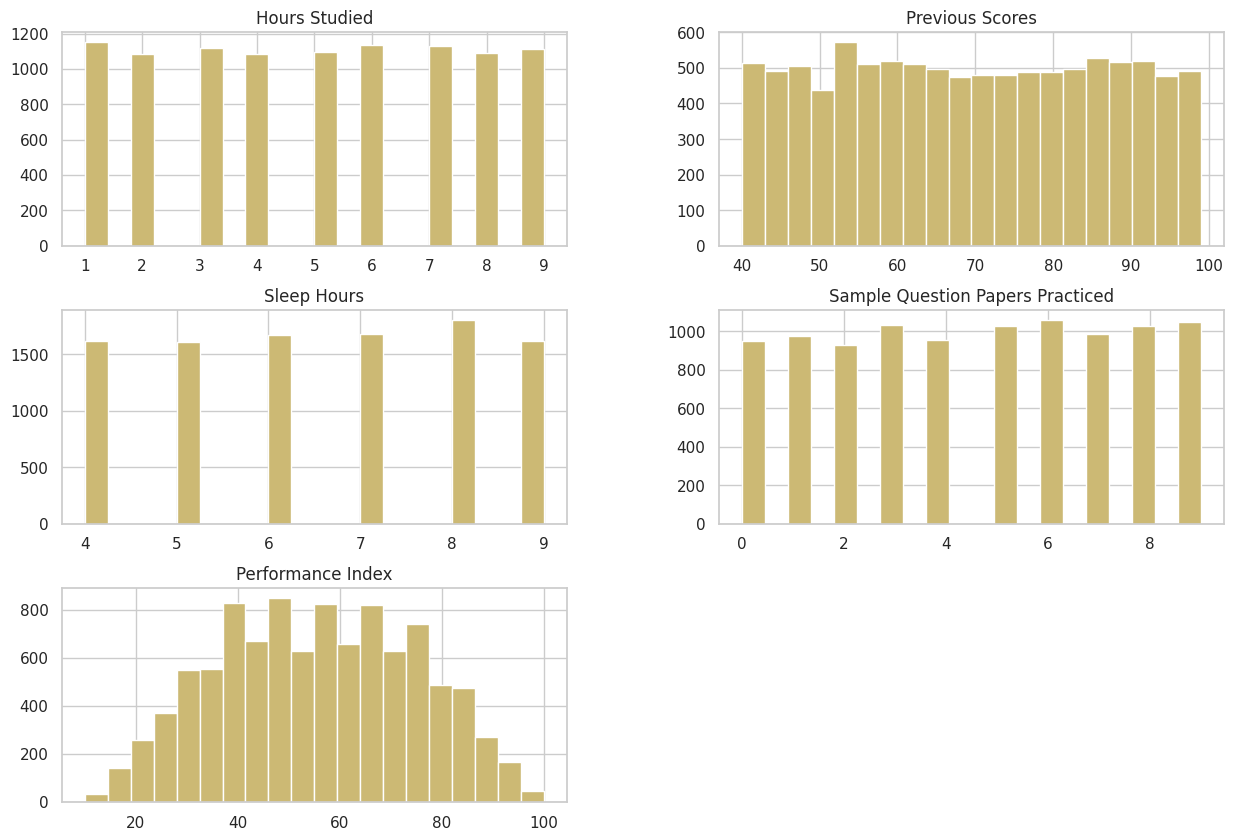

In [49]:
#univariate analysis
df.hist(bins=20,figsize=(15,10),color='y')
plt.show()

In [50]:
#categorial value
for col in df.select_dtypes(include='object'):
    print(df[col].value_counts())

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64


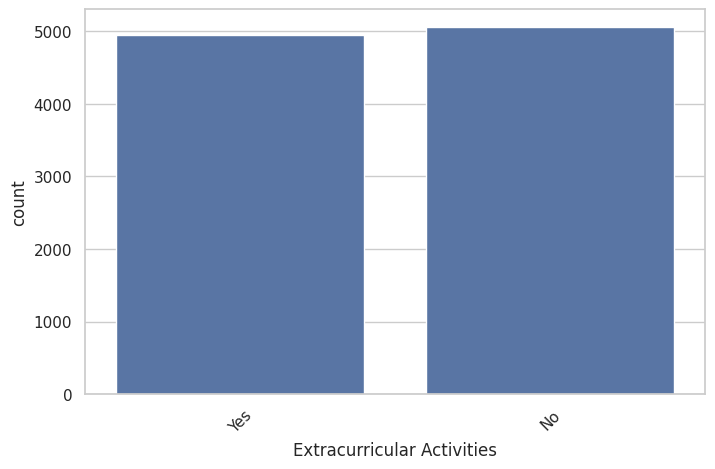

In [51]:
sns.countplot(x=df[col])
plt.xticks(rotation=45)
plt.show()

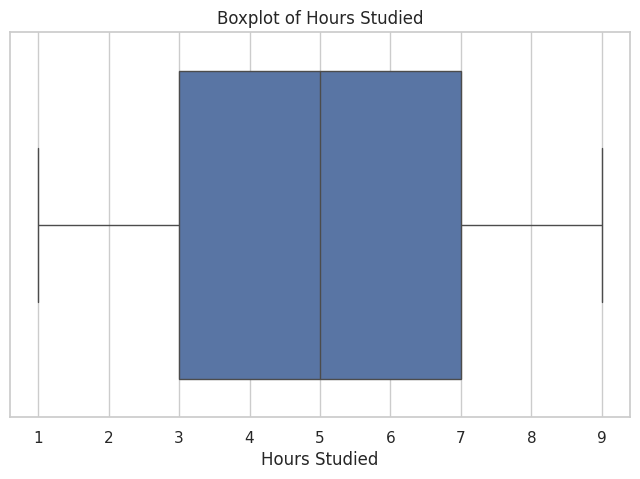

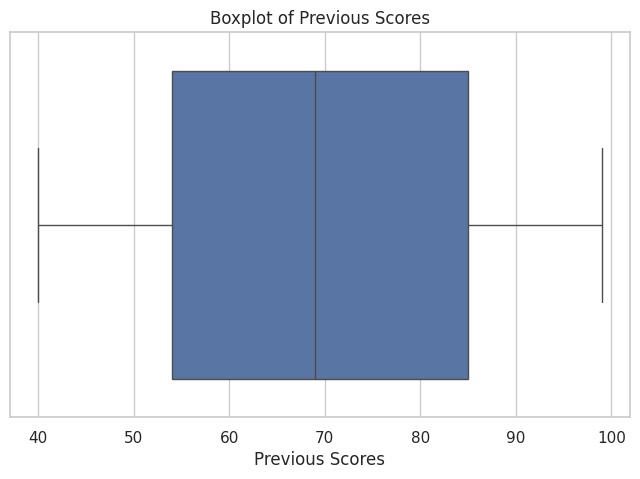

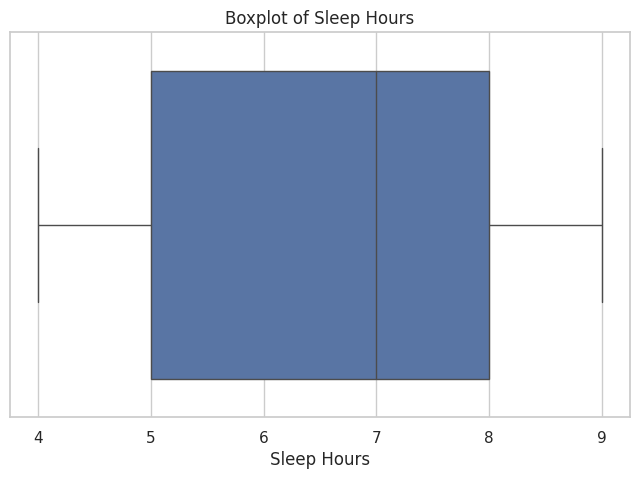

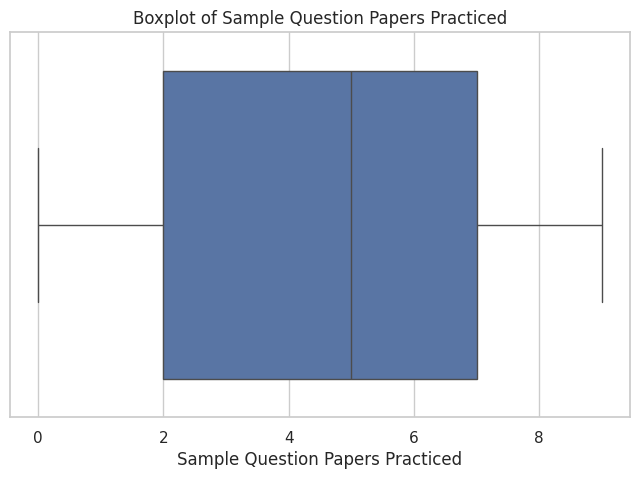

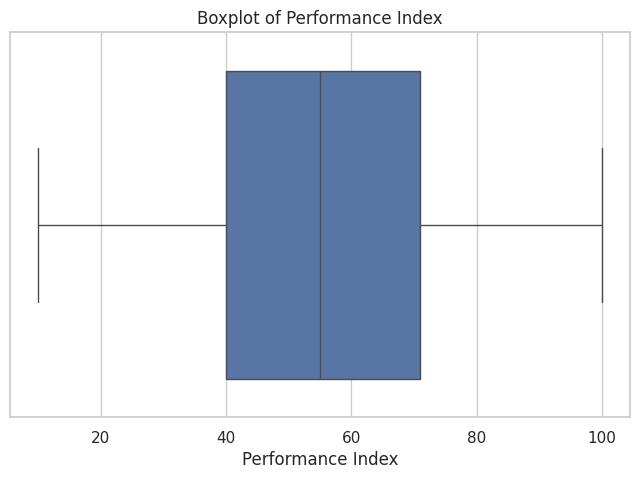

In [67]:
#outlier detection
for col in df.select_dtypes(include=np.number):
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [53]:
#bivariate analysis
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


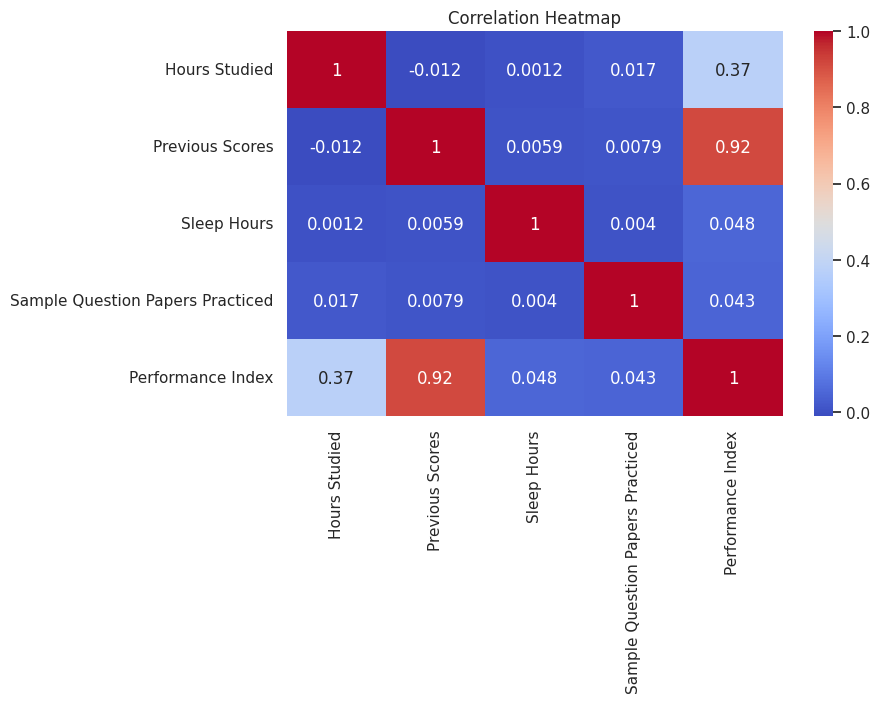

In [54]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

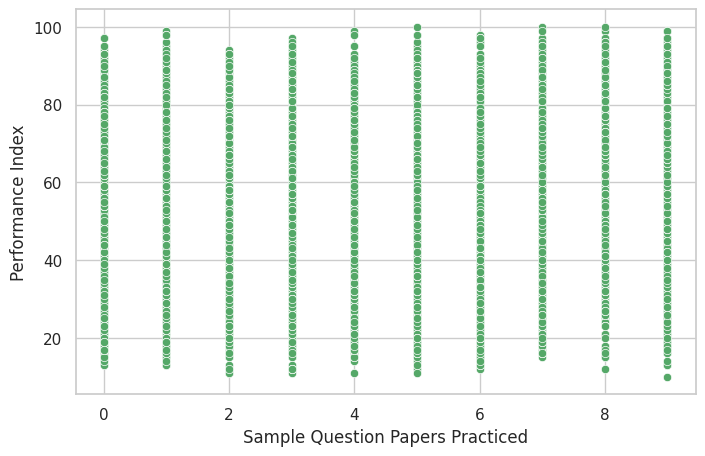

In [64]:
#scatter plot(numerical vs numerical)
sns.scatterplot(x='Sample Question Papers Practiced', y='Performance Index',data=df,color="g")
plt.show()

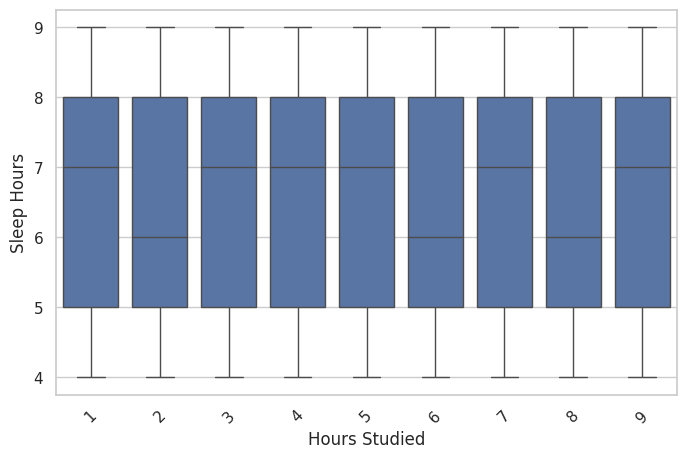

In [56]:
#categorical vs numerical
sns.boxplot(x='Hours Studied', y='Sleep Hours', data=df)
plt.xticks(rotation=45)
plt.show()

In [57]:
#hypothesis testing
df.groupby('Extracurricular Activities')['Performance Index'].mean()

,Performance Index
Extracurricular Activities,
No,54.758511
Yes,55.700889


In [58]:
#correlation between two variables
df['Sleep Hours'].corr(df['Performance Index'])


np.float64(0.04810583543435253)

In [59]:
df['Previous Scores'].corr(df['Performance Index'])

np.float64(0.9151891412264476)

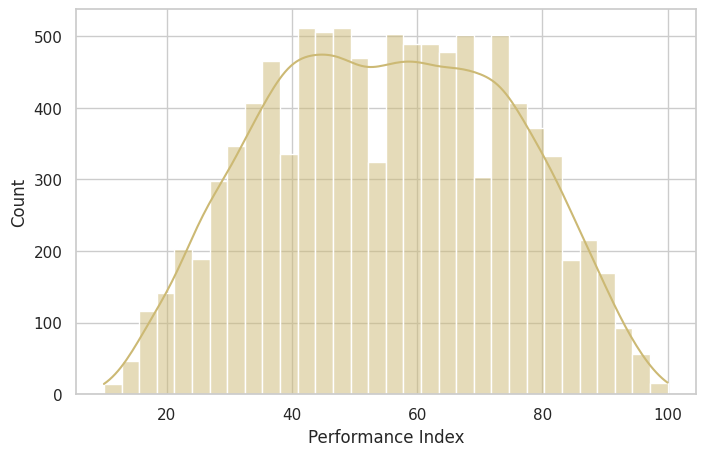

In [60]:
#Normality check
sns.histplot(df['Performance Index'], kde=True,color='y')
plt.show()

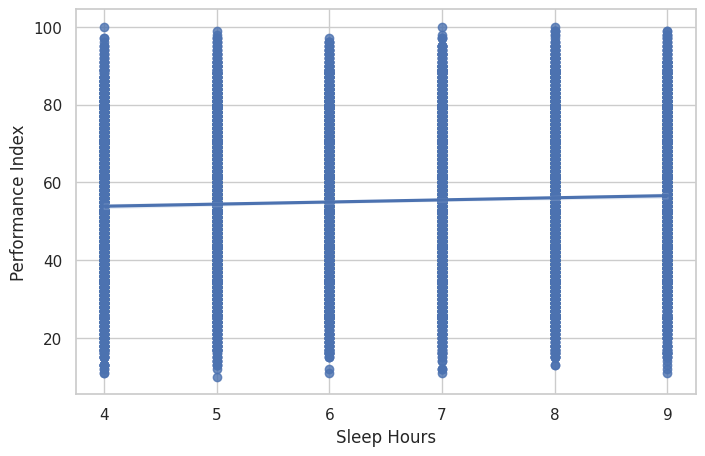

In [61]:
#Regression plot
sns.regplot(x='Sleep Hours', y='Performance Index', data=df)
plt.show()

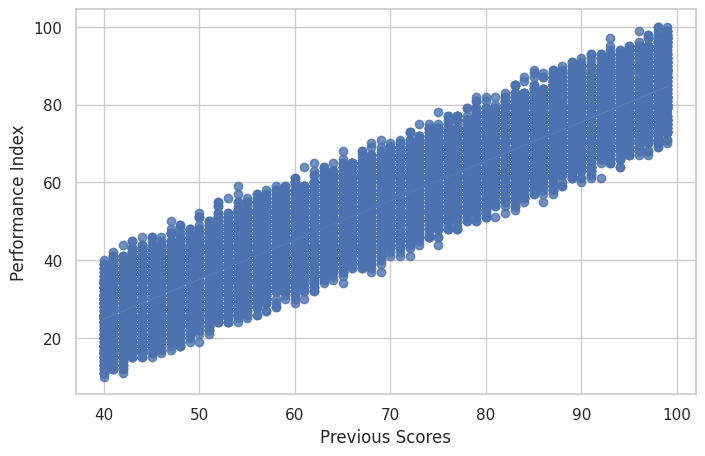

In [62]:
sns.regplot(x='Previous Scores', y='Performance Index', data=df)
plt.show()

In [63]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000
